<a href="https://colab.research.google.com/github/kywch/geo-colab/blob/master/Chicago_Clear_LST_24hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

     |████████████████████████████████| 18.1MB 2.4MB/s 


In [ ]:
# Import necessary packages
import os, os.path
from glob import glob
from shutil import copyfile

import folium
from folium import plugins
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
from matplotlib import colors as colors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files = glob("drive/My Drive/SatTemp/SatTemp_Glynn/*.tif")
print(files)

['drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010100.001.20201001084921.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010200.001.20201001090223.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010000.001.20201001083642.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010300.001.20201001091528.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906011200.001.20201001112641.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010800.001.20201001102538.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906012100.001.20201001135953.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010600.001.20201001095644.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906011300.001.20201001114247.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010900.001.20201001104034.tif', 'drive/My Drive/SatTemp/SatTemp_Glynn/M

In [ ]:
!rm -rf geotiff
if not os.path.exists('geotiff'):
  os.mkdir('geotiff')

In [ ]:
# copy these files from Google Drive to colab disk
for f in files:
  print(f)
  copyfile(f, 'geotiff/' + os.path.basename(f))

drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010100.001.20201001084921.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010200.001.20201001090223.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010000.001.20201001083642.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010300.001.20201001091528.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906011200.001.20201001112641.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010800.001.20201001102538.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906012100.001.20201001135953.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010600.001.20201001095644.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906011300.001.20201001114247.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010900.001.20201001104034.tif
drive/My Drive/SatTemp/SatTemp_Glynn/MuSLI_Cloud_Chicago.201906010400.

In [ ]:
# sorting will give us the files from June 1st 00 hour to June 3rd 23 hour
lst_files = glob("geotiff/*LST*.tif")
lst_files.sort()
print(lst_files)

cloud_files = glob("geotiff/*Cloud*.tif")
cloud_files.sort()
print(cloud_files)

all_files = glob("geotiff/*.tif")
all_files.sort()
print(all_files)

['geotiff/MuSLI_LST_Chicago.201906010000.001.20201001083642.tif', 'geotiff/MuSLI_LST_Chicago.201906010100.001.20201001084921.tif', 'geotiff/MuSLI_LST_Chicago.201906010200.001.20201001090223.tif', 'geotiff/MuSLI_LST_Chicago.201906010300.001.20201001091528.tif', 'geotiff/MuSLI_LST_Chicago.201906010400.001.20201001092901.tif', 'geotiff/MuSLI_LST_Chicago.201906010500.001.20201001094243.tif', 'geotiff/MuSLI_LST_Chicago.201906010600.001.20201001095644.tif', 'geotiff/MuSLI_LST_Chicago.201906010700.001.20201001101112.tif', 'geotiff/MuSLI_LST_Chicago.201906010800.001.20201001102538.tif', 'geotiff/MuSLI_LST_Chicago.201906010900.001.20201001104034.tif', 'geotiff/MuSLI_LST_Chicago.201906011000.001.20201001105542.tif', 'geotiff/MuSLI_LST_Chicago.201906011100.001.20201001111111.tif', 'geotiff/MuSLI_LST_Chicago.201906011200.001.20201001112641.tif', 'geotiff/MuSLI_LST_Chicago.201906011300.001.20201001114247.tif', 'geotiff/MuSLI_LST_Chicago.201906011400.001.20201001115905.tif', 'geotiff/MuSLI_LST_Chica

In [ ]:
for file in lst_files[:3]:
  print(file.split('_'))
  print(file.split('_')[1] + '_' + file.split('_')[2][14:16] + '-' + file.split('_')[2][16:18])
#lst_files[num].split('_')[3] + '_' + lst_files[num].split('_')[4]

for file in cloud_files[:3]:
  print(file.split('_'))
  print(file.split('_')[1] + '_' + file.split('_')[2][14:16] + '-' + file.split('_')[2][16:18])


['geotiff/MuSLI', 'LST', 'Chicago.201906010000.001.20201001083642.tif']
LST_01-00
['geotiff/MuSLI', 'LST', 'Chicago.201906010100.001.20201001084921.tif']
LST_01-01
['geotiff/MuSLI', 'LST', 'Chicago.201906010200.001.20201001090223.tif']
LST_01-02
['geotiff/MuSLI', 'Cloud', 'Chicago.201906010000.001.20201001083642.tif']
Cloud_01-00
['geotiff/MuSLI', 'Cloud', 'Chicago.201906010100.001.20201001084921.tif']
Cloud_01-01
['geotiff/MuSLI', 'Cloud', 'Chicago.201906010200.001.20201001090223.tif']
Cloud_01-02


In [ ]:
boundary = {}
raster = {}
nodata = {}
src_crs = {}

for file in all_files:
  #key = file.split('_')[2] + '_' + file.split('_')[3]
  key = file.split('_')[1] + '_' + file.split('_')[2][14:16] + '-' + file.split('_')[2][16:18]
  #print(key)
  with rio.open(file) as src:
    boundary[key] = src.bounds
    if 'LST' in key:
      raster[key] = src.read() - 273.15
    else:
      raster[key] = src.read()
    nodata[key] = src.nodata
    src_crs[key] = src.crs

In [ ]:
raster_bound = boundary['Cloud_01-00']
raster_shape = raster['Cloud_01-00'].shape[1:]

print(raster_bound, raster_shape)

slope_lng = (raster_bound[2] - raster_bound[0]) / raster_shape[1]
slope_lat = (raster_bound[3] - raster_bound[1]) / raster_shape[0]

print(slope_lng, slope_lat)

uchicago_loc = [41.7886, -87.5987] # lat, lng

rst_xx = raster_bound[0] + (uchicago_loc[1] - raster_bound[0]) / slope_lng
rst_yy = raster_bound[1] + (uchicago_loc[0] - raster_bound[1]) / slope_lat
print(rst_xx, rst_yy)

def get_xy(coord, bound):
  slope_lat = (bound[3] - bound[1]) / raster_shape[0]
  slope_lng = (bound[2] - bound[0]) / raster_shape[1]

  rst_lat = round((bound[3] - coord[0]) / slope_lat) # lat
  rst_lng = round((coord[1] - bound[0]) / slope_lng) # lng
  print(rst_lat, rst_lng)

get_xy(uchicago_loc, raster_bound)

get_xy([raster_bound[1],raster_bound[0]], raster_bound)

get_xy([raster_bound[1],raster_bound[2]], raster_bound)

get_xy([raster_bound[3],raster_bound[0]], raster_bound)

get_xy([raster_bound[3],raster_bound[2]], raster_bound)

# cordinate 

BoundingBox(left=-88.26368408376308, bottom=41.46612652341049, right=-87.31312550993508, top=42.14968408376307) (685, 952)
0.000998485896878156 0.0009978942486899014
577.7287809497562 364.62008498431805
362 666
685 0
685 952
0 0
0 952


In [ ]:
keys = list(boundary.keys())
print(keys[33])

tkeys = [key.split('_')[1] for key in keys[:(24*13)]]
#tkeys[33]

Cloud_02-09


In [ ]:
masked_raster = {}
prop_nan = {}

for key in tkeys:
  masked_raster[key] = raster['LST_'+key]
  masked_raster[key][raster['Cloud_'+key] == 1] = np.nan
  masked_raster[key][raster['LST_'+key] < 0] = np.nan
  prop_nan[key] = np.average(np.isnan(masked_raster[key]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


In [ ]:
#np.average(np.isnan(masked_raster[key]))
prop_nan

{'01-00': 0.4554759860148439,
 '01-01': 0.802036435011961,
 '01-02': 0.9984435379991413,
 '01-03': 0.75987854996013,
 '01-04': 0.5316460160706619,
 '01-05': 0.6165153652701957,
 '01-06': 0.8087683248481875,
 '01-07': 0.830480586395142,
 '01-08': 0.748458872600135,
 '01-09': 0.8548871373366865,
 '01-10': 0.8505029749125927,
 '01-11': 0.7391891062994541,
 '01-12': 0.9580644666625774,
 '01-13': 0.9680932957124455,
 '01-14': 0.9074648837637245,
 '01-15': 0.8787278415015641,
 '01-16': 0.29171471508311353,
 '01-17': 0.4943461326136294,
 '01-18': 0.8372983499969331,
 '01-19': 0.9112203275470773,
 '01-20': 0.9967367969085444,
 '01-21': 0.966354351959762,
 '01-22': 0.9035790958719254,
 '01-23': 1.0,
 '02-00': 1.0,
 '02-01': 0.9471692326565663,
 '02-02': 0.501873888241428,
 '02-03': 0.33637520701711343,
 '02-04': 0.2329509906152242,
 '02-05': 0.37118781819297064,
 '02-06': 0.260757222597068,
 '02-07': 0.4707109121020671,
 '02-08': 0.3494801570263142,
 '02-09': 0.1410307918787953,
 '02-10': 0.0,


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


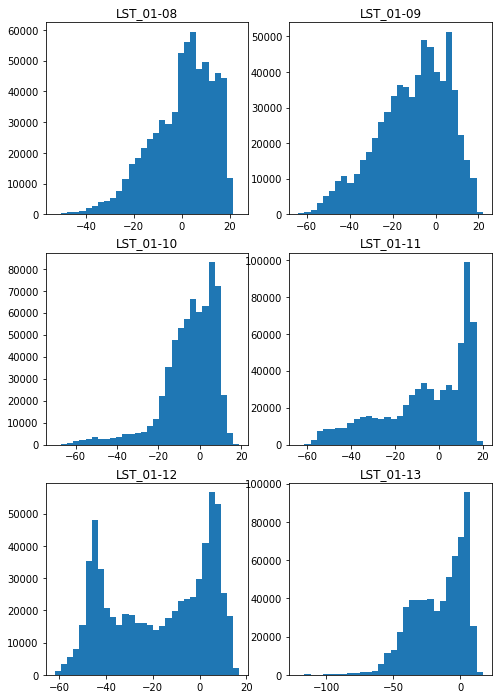

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8,12))
axs = list(flatten(axs))

for ii in range(6):
  key = keys[ii+80]
  tmin = np.floor(np.nanmin(raster[key]))
  tmax = np.ceil(np.nanmax(raster[key]))
  axs[ii].hist(raster[key].ravel(), bins=30, range=(tmin, tmax))
  axs[ii].set_title(key)
#plt.show()

In [ ]:
import pandas as pd

# create a wide-form pandas
masked_raster_df = pd.DataFrame()

for key in masked_raster.keys():
  masked_raster_df[key] = masked_raster[key].ravel()

masked_raster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652120 entries, 0 to 652119
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   01-00   355095 non-null  float64
 1   01-01   129096 non-null  float64
 2   01-02   1015 non-null    float64
 3   01-03   156588 non-null  float64
 4   01-04   305423 non-null  float64
 5   01-05   250078 non-null  float64
 6   01-06   124706 non-null  float64
 7   01-07   110547 non-null  float64
 8   01-08   164035 non-null  float64
 9   01-09   94631 non-null   float64
 10  01-10   97490 non-null   float64
 11  01-11   170080 non-null  float64
 12  01-12   27347 non-null   float64
 13  01-13   20807 non-null   float64
 14  01-14   60344 non-null   float64
 15  01-15   79084 non-null   float64
 16  01-16   461887 non-null  float64
 17  01-17   329747 non-null  float64
 18  01-18   106101 non-null  float64
 19  01-19   57895 non-null   float64
 20  01-20   2128 non-null    float64
 21  01-21   21

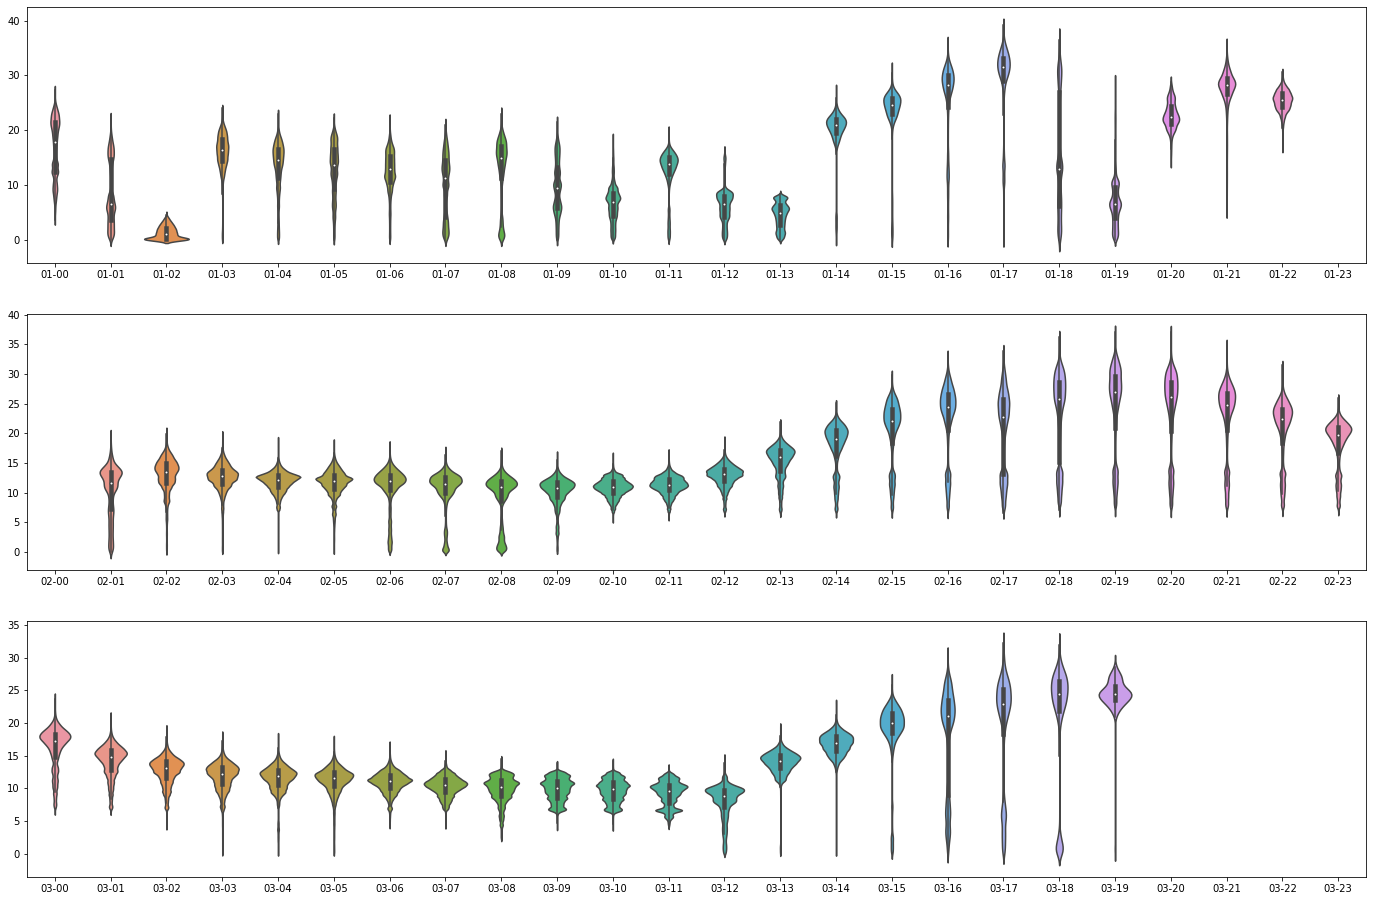

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(nrows=3, figsize=(24,16))

sns.violinplot(data=masked_raster_df.iloc[:,0:24], ax=axs[0])
sns.violinplot(data=masked_raster_df.iloc[:,24:48], ax=axs[1])
sns.violinplot(data=masked_raster_df.iloc[:,48:72], ax=axs[2])

In [ ]:
def mapvalue2color(value, cmap): 
    """
    Map a pixel value of image to a color in the rgba format. 
    As a special case, nans will be mapped totally transparent.
    
    Inputs
        -- value - pixel value of image, could be np.nan
        -- cmap - a linear colormap from branca.colormap.linear
    Output
        -- a color value in the rgba format (r, g, b, a)    
    """
    if np.isnan(value):
        return (1, 0, 0, 0)
    else:
        return colors.to_rgba(cmap(value), 0.85)

uchicago_loc = [41.7886, -87.5987]
bounds = [[boundary['LST_02-12'].bottom, boundary['LST_02-12'].left], [boundary['LST_02-12'].top, boundary['LST_02-12'].right]],

# Create a map using the Map() function and the coordinates for Chicago, IL
m = folium.Map(location=uchicago_loc, 
               tiles='Stamen Terrain', 
               zoom_start=14)

# best LST maps
# Check the previous weather here: https://www.timeanddate.com/weather/usa/chicago/historic?month=6&year=2019
# '07-15'
# '11-14'

key = '11-14'

tmp_map = masked_raster[key][0]
tmp_map[361:364, 665:668] = 0
tmp_map[362, 666] = 50

# adjust the color map
import branca.colormap as cm
tmin = 20 #np.floor(np.nanmin(masked_raster[key]))
tmax = 35 #np.ceil(np.nanmax(masked_raster[key]))
tmp_color = cm.linear.RdBu_11.colors.copy()
#tmp_color = cm.linear.Greys_09.colors
tmp_color.reverse()
colormap = cm.LinearColormap(
    colors = tmp_color, 
    vmin = tmin, 
    vmax = tmax)
print('Colormap range: ', tmin, tmax)

# overlay the raster
folium.raster_layers.ImageOverlay(
    image = tmp_map, #masked_raster[key][0],
    name = key,
    opacity = 0.7,
    pixelated = True,
    bounds = bounds,
    colormap= lambda value: mapvalue2color(value, colormap)
).add_to(m)

folium.Marker(uchicago_loc, popup='UChicago').add_to(m)

folium.LayerControl().add_to(m)
colormap.caption = 'MuSLI_LST'
m.add_child(colormap)

m


Colormap range:  20 35


In [ ]:
import branca.colormap as cm
tmin = np.floor(np.nanmin(raster[key]))
tmax = np.ceil(np.nanmax(raster[key]))
tmp_color = cm.linear.Greys_09.colors
print(tmp_color)

[(1.0, 1.0, 1.0, 1.0), (0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 1.0), (0.8509803921568627, 0.8509803921568627, 0.8509803921568627, 1.0), (0.7411764705882353, 0.7411764705882353, 0.7411764705882353, 1.0), (0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 1.0), (0.45098039215686275, 0.45098039215686275, 0.45098039215686275, 1.0), (0.3215686274509804, 0.3215686274509804, 0.3215686274509804, 1.0), (0.1450980392156863, 0.1450980392156863, 0.1450980392156863, 1.0), (0.0, 0.0, 0.0, 1.0)]


In [ ]:
axs

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3)

key = '2_11'
tmin = np.floor(np.nanmin(raster[key]))
tmax = np.ceil(np.nanmax(raster[key]))
plt.hist(raster[key].ravel(), bins=30, range=(tmin, tmax))
plt.show()

In [ ]:
# sorting will give us the files from June 1st 00 hour to June 3rd 23 hour
lst_files = glob("geotiff/*_LST_*.tif")
lst_files.sort()
print(lst_files)

['geotiff/MuSLI_LST_Chicago.201906010000.001.20201001083642.tif', 'geotiff/MuSLI_LST_Chicago.201906010100.001.20201001084921.tif', 'geotiff/MuSLI_LST_Chicago.201906010200.001.20201001090223.tif', 'geotiff/MuSLI_LST_Chicago.201906010300.001.20201001091528.tif', 'geotiff/MuSLI_LST_Chicago.201906010400.001.20201001092901.tif', 'geotiff/MuSLI_LST_Chicago.201906010500.001.20201001094243.tif', 'geotiff/MuSLI_LST_Chicago.201906010600.001.20201001095644.tif', 'geotiff/MuSLI_LST_Chicago.201906010700.001.20201001101112.tif', 'geotiff/MuSLI_LST_Chicago.201906010800.001.20201001102538.tif', 'geotiff/MuSLI_LST_Chicago.201906010900.001.20201001104034.tif', 'geotiff/MuSLI_LST_Chicago.201906011000.001.20201001105542.tif', 'geotiff/MuSLI_LST_Chicago.201906011100.001.20201001111111.tif', 'geotiff/MuSLI_LST_Chicago.201906011200.001.20201001112641.tif', 'geotiff/MuSLI_LST_Chicago.201906011300.001.20201001114247.tif', 'geotiff/MuSLI_LST_Chicago.201906011400.001.20201001115905.tif', 'geotiff/MuSLI_LST_Chica

In [ ]:
lst_files[10].split('.')[1][7] + '_' + lst_files[10].split('.')[1][8:10]

'1_10'

In [ ]:
boundary = {}
raster = {}
nodata = {}
src_crs = {}

for file in lst_files:
  key = file.split('.')[1][7] + '_' + file.split('.')[1][8:10]
  with rio.open(file) as src:
    boundary[key] = src.bounds
    raster[key] = src.read()
    nodata[key] = src.nodata
    src_crs[key] = src.crs

In [ ]:
#boundary
#nodata
#src_crs

In [ ]:
clat = (boundary[key].bottom + boundary[key].top)/2
clon = (boundary[key].left + boundary[key].right)/2
print(key, clat, clon)

3_23 41.80790530358678 -87.78840479684908


In [ ]:
import pandas as pd

# create a wide-form pandas
raster_df = pd.DataFrame()

In [ ]:
for key in raster.keys():
  raster_df[key] = raster[key].ravel()

raster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652120 entries, 0 to 652119
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   1_00    652120 non-null  float64
 1   1_01    652120 non-null  float64
 2   1_02    652120 non-null  float64
 3   1_03    652120 non-null  float64
 4   1_04    652120 non-null  float64
 5   1_05    652120 non-null  float64
 6   1_06    652120 non-null  float64
 7   1_07    652120 non-null  float64
 8   1_08    652120 non-null  float64
 9   1_09    652120 non-null  float64
 10  1_10    652120 non-null  float64
 11  1_11    652120 non-null  float64
 12  1_12    652120 non-null  float64
 13  1_13    632590 non-null  float64
 14  1_14    538919 non-null  float64
 15  1_15    593323 non-null  float64
 16  1_16    642421 non-null  float64
 17  1_17    652120 non-null  float64
 18  1_18    652120 non-null  float64
 19  1_19    629286 non-null  float64
 20  1_20    247209 non-null  float64
 21  1_21    33

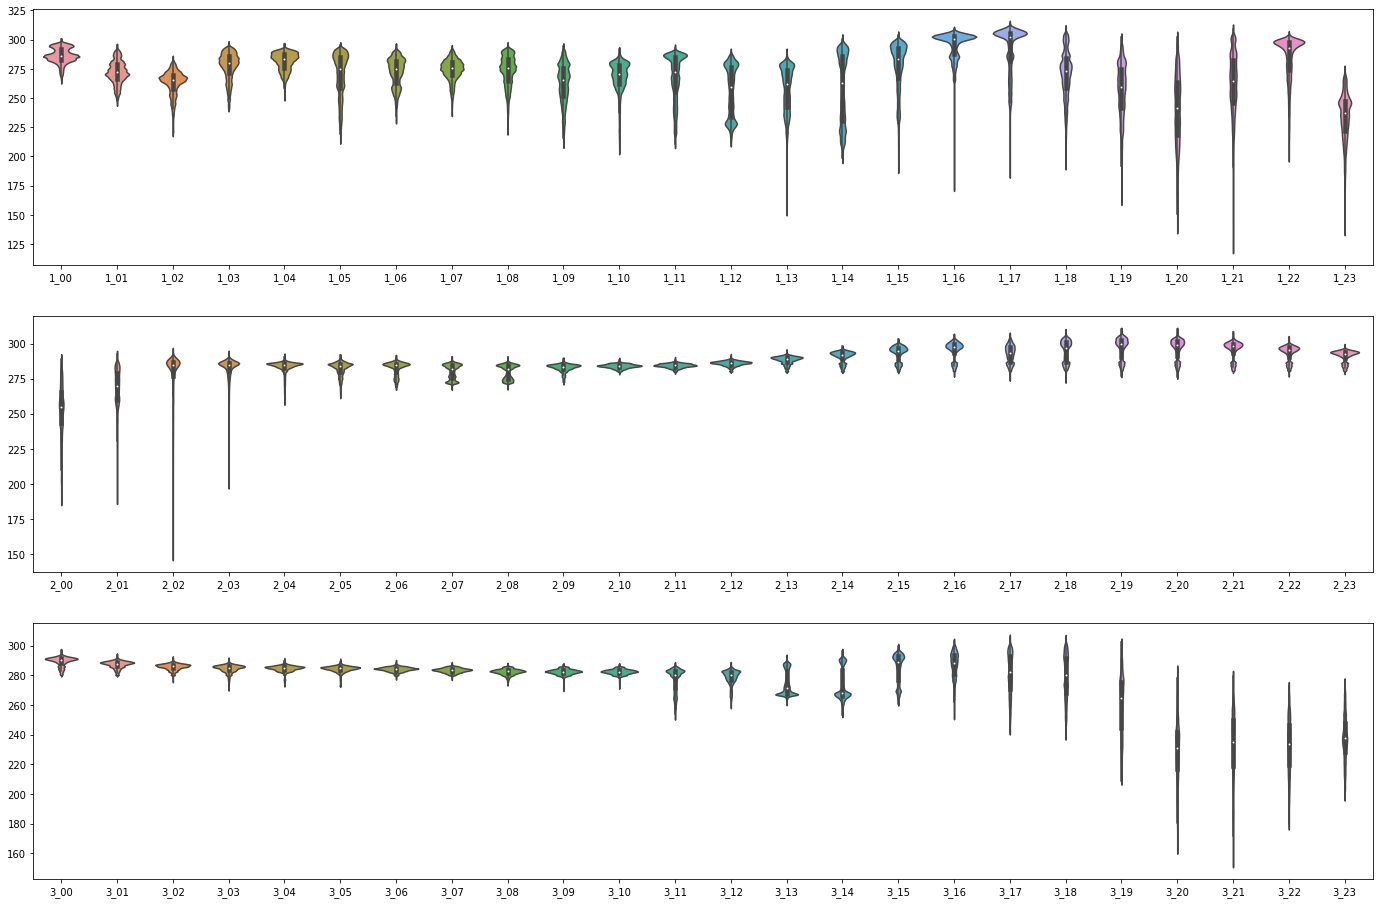

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(nrows=3, figsize=(24,16))

sns.violinplot(data=raster_df.iloc[:,0:24], ax=axs[0])
sns.violinplot(data=raster_df.iloc[:,24:48], ax=axs[1])
sns.violinplot(data=raster_df.iloc[:,48:72], ax=axs[2])

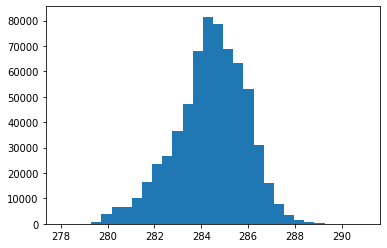

In [ ]:
key = '2_11'
tmin = np.floor(np.nanmin(raster[key]))
tmax = np.ceil(np.nanmax(raster[key]))
plt.hist(raster[key].ravel(), bins=30, range=(tmin, tmax))
plt.show()

In [ ]:
def mapvalue2color(value, cmap): 
    """
    Map a pixel value of image to a color in the rgba format. 
    As a special case, nans will be mapped totally transparent.
    
    Inputs
        -- value - pixel value of image, could be np.nan
        -- cmap - a linear colormap from branca.colormap.linear
    Output
        -- a color value in the rgba format (r, g, b, a)    
    """
    if np.isnan(value):
        return (1, 0, 0, 0)
    else:
        return colors.to_rgba(cmap(value), 0.85)

In [ ]:
#boundary
#src.bounds
#img.shape

In [ ]:
uchicago_loc = [41.7886, -87.5987]

# Create a map using the Map() function and the coordinates for Chicago, IL
m = folium.Map(location=uchicago_loc, 
               tiles='Stamen Terrain', 
               zoom_start=14)

key = '2_11'

# adjust the color map
import branca.colormap as cm
tmin = np.floor(np.nanmin(raster[key]))
tmax = np.ceil(np.nanmax(raster[key]))
tmp_color = cm.linear.RdBu_11.colors
colormap = cm.LinearColormap(
    colors = cm.linear.RdBu_11.colors, 
    vmin = tmin, 
    vmax = tmax)
print('Colormap range: ', tmin, tmax)

# overlay the raster
folium.raster_layers.ImageOverlay(
    image = raster[key][0],
    name = key,
    opacity = 0.7,
    pixelated = True,
    bounds = [[boundary[key].bottom, boundary[key].left], [boundary[key].top, boundary[key].right]],
    colormap= lambda value: mapvalue2color(value, colormap)
).add_to(m)

folium.Marker(uchicago_loc, popup='UChicago').add_to(m)

folium.LayerControl().add_to(m)
colormap.caption = 'MuSLI_LST'
m.add_child(colormap)

m


Colormap range:  278.0 291.0
